# Regresión Lineal
## 1. Importación de librerías y establecimiento de directorio de trabajo

In [1]:
# librerías básicas 
import os
import pandas as pd  
import numpy as np  
import warnings  
warnings.filterwarnings('ignore')
  
# para la construcción del modelo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 

# para obtener métricas
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# para guardar el modelo
import pickle
  
# para visualización
import seaborn as sns  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline  

os.chdir("C:/Users/aleja/OneDrive - Universidad Politécnica de Madrid/Universidad/Asignaturas/Cuarto/Trabajo de Fin de Grado")

## 2. Carga de datos

In [2]:
accesos = pd.read_csv("Resultados/Accesos/Accesos_Calidad_Vida.csv", index_col="Unnamed: 0")
accesos.head()

,latitud,longitud,edad,calidad_vida
0,41.621468,2.068474,11,52.885748
1,41.600270,2.085002,12,74.793875
2,41.616524,2.089927,12,79.858657
3,41.618820,2.089480,11,79.858657
4,41.618908,2.089475,12,79.858657


## 3. Análisis exploratorio de datos
A continuación se verá la correlación que hay entre cada tipo de dato 

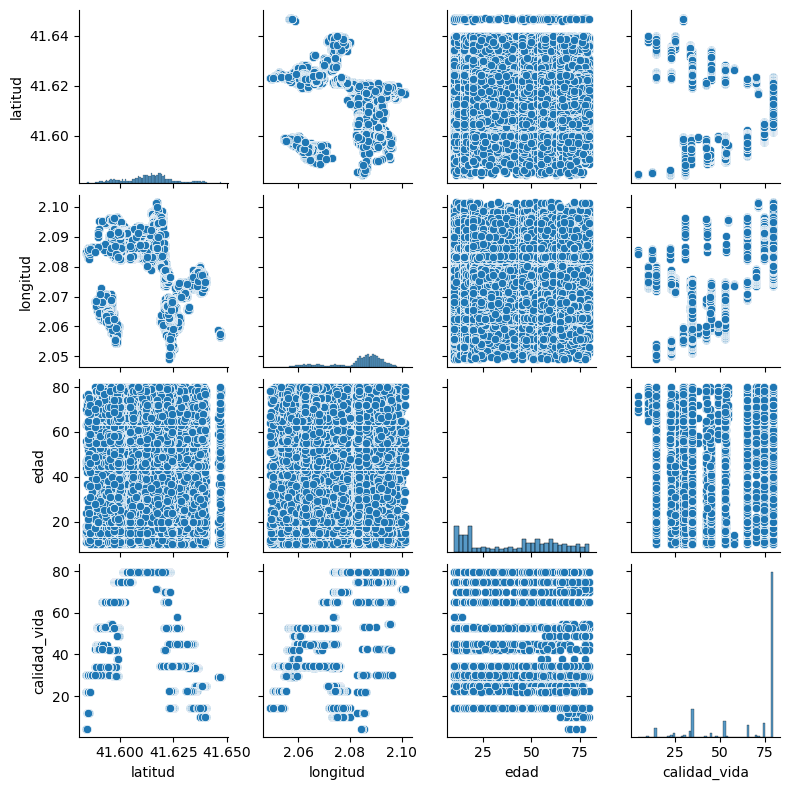

In [3]:
sns.pairplot(data = accesos, height = 2)

### 3.1. Correlación entre las variables independientes
Se visualizará una matriz del coeficiente de correlación de Pearson

Matriz del Coeficiente de Correlación de Pearson para cada variable independiente: 
            latitud  longitud      edad
latitud   1.000000 -0.108841  0.000211
longitud -0.108841  1.000000  0.000700
edad      0.000211  0.000700  1.000000


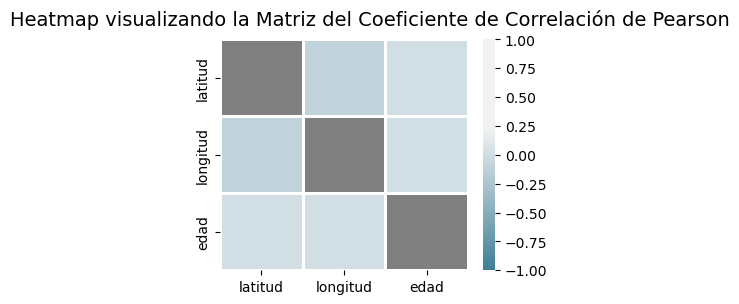

In [4]:
corr = accesos[['latitud', 'longitud', 'edad']].corr()  
print('Matriz del Coeficiente de Correlación de Pearson para cada variable independiente: \n', corr)  
  
# máscara de las celdas diagonales
masking = np.zeros_like(corr, dtype = np.bool)  
np.fill_diagonal(masking, val = True)  
  
# inicializar la figura
figure, axis = plt.subplots(figsize = (4, 3))  
  
# generar una rampa de color
c_map = sns.diverging_palette(223, 14, as_cmap = True, sep = 100)  
c_map.set_bad('grey')  
  
# mostrar el heatmap con la máscara y el formato correcto
sns.heatmap(corr, mask = masking, cmap = c_map, vmin = -1, vmax = 1, center = 1, linewidths = 1)  
figure.suptitle('Heatmap visualizando la Matriz del Coeficiente de Correlación de Pearson', fontsize = 14)  
axis.tick_params(axis = 'both', which = 'major', labelsize = 10)  

## 4. Construcción de la matriz de características (X) y el vector variable dependiente (y)

In [5]:
X = accesos.iloc[:, :-1].values
y = accesos.iloc[:, -1].values

## 5. División del dataset en set de entrenamiento y de test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

In [7]:
X_train

array([[41.60615904,  2.0898377 , 40.        ],
       [41.60614936,  2.08975174, 71.        ],
       [41.62314396,  2.05677467, 32.        ],
       ...,
       [41.60997733,  2.08372107, 77.        ],
       [41.60808701,  2.08897538, 65.        ],
       [41.61697212,  2.08557581, 32.        ]])

## 6. Normalizar X (rango: -3 a 3)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 7. Construcción y entrenamiento del modelo de regresión sobre el set de entrenamiento

In [9]:
regressor = LinearRegression() # se crea el modelo
regressor.fit(X_train, y_train) # se entrena el modelo con el dataset de entrenamiento

LinearRegression()

## 8. Predicción de resultados del set de test

In [10]:
y_pred = regressor.predict(X_test)

## 9.  Métricas de rendimiento

In [11]:
# R2score
print('R2score:', r2_score(y_test, y_pred))

# Mean Absolute Error
print('MAE: \t', mean_absolute_error(y_test, y_pred))

# Mean Squared Error
print('MSE: \t', mean_squared_error(y_test, y_pred))

# Root Mean Squared Error
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

R2score: 0.6663601370067695
MAE: 	 8.363703950953441
MSE: 	 134.59041157041747
RMSE:  11.601310769495724


### 9.1. Para ganar más intuición

In [12]:
np.set_printoptions(precision=2) # redondea a dos decimales

print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

# concatenamos el set predicho y el de test, así podemos ver mejor las diferencias entre los dos

[[18.19 29.09]
 [83.01 74.79]
 [55.71 79.86]
 ...
 [79.64 79.86]
 [68.95 79.86]
 [68.12 79.86]]


## 10. Obtener los coeficientes de la regresión lineal múltiple

In [13]:
print(regressor.coef_)
print(regressor.intercept_)

[-4.72 15.1  -1.04]
67.10846709807267


## 11. Visualizar el modelo
Al tener más de 3 dimensiones, se debe visualizar parcialmente, por lo que se representará mezclando cada variable independiente
### 11.1. Latitud y longitud

Text(0.5, 0.98, 'Multi-Linear Regression Model Visualization (R2 = -178642976.29877907)')

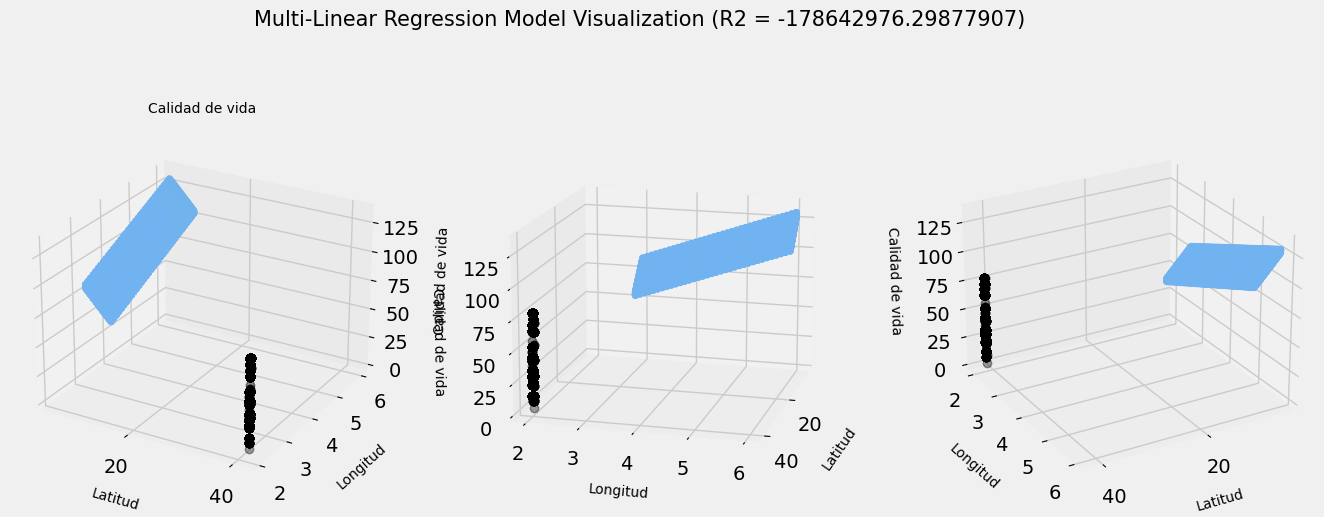

In [14]:
# Plotting a 3-D plot for visualizing the Multiple Linear Regression Model  
  
# Preparing the data  
independent = accesos[['latitud', 'longitud']].values.reshape(-1,2)  
dependent = accesos['calidad_vida']  
  
# Creating a variable for each dimension  
x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
  
x_range = np.linspace(5, 10, 35)    
y_range = np.linspace(3, 6, 35)   
x1_range = np.linspace(3, 6, 35)  
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)  
viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T  
  
# Predicting price values using the linear regression model built above  
predictions = regressor.predict(viz)  
  
# Evaluating the model using the R2 square of the model  
r2 = regressor.score(X, y)  
  
# Ploting the model for visualization  
plt.style.use('fivethirtyeight')  
  
# Initializing a matplotlib figure  
fig = plt.figure(figsize = (15, 6))  
  
axis1 = fig.add_subplot(131, projection = '3d')  
axis2 = fig.add_subplot(132, projection = '3d')  
axis3 = fig.add_subplot(133, projection = '3d')  
  
axes = [axis1, axis2, axis3]  

axis1.set_title('Calidad de vida', fontsize = 10)  

for ax in axes:  
    ax.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
    ax.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')  
    ax.set_xlabel('Latitud', fontsize = 10, labelpad = 10)  
    ax.set_ylabel('Longitud', fontsize = 10, labelpad = 10)  
    ax.set_zlabel('Calidad de vida', fontsize = 10, labelpad = 10)  
    ax.locator_params(nbins = 3, axis = 'x')  
    ax.locator_params(nbins = 3, axis = 'x')  
  
axis1.view_init(elev=25, azim=-60)  
axis2.view_init(elev=15, azim=15)  
axis3.view_init(elev=25, azim=60)  
  
fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k')  

### 11.2. Edad y longitud

Text(0.5, 0.98, 'Multi-Linear Regression Model Visualization (R2 = -178642976.29877907)')

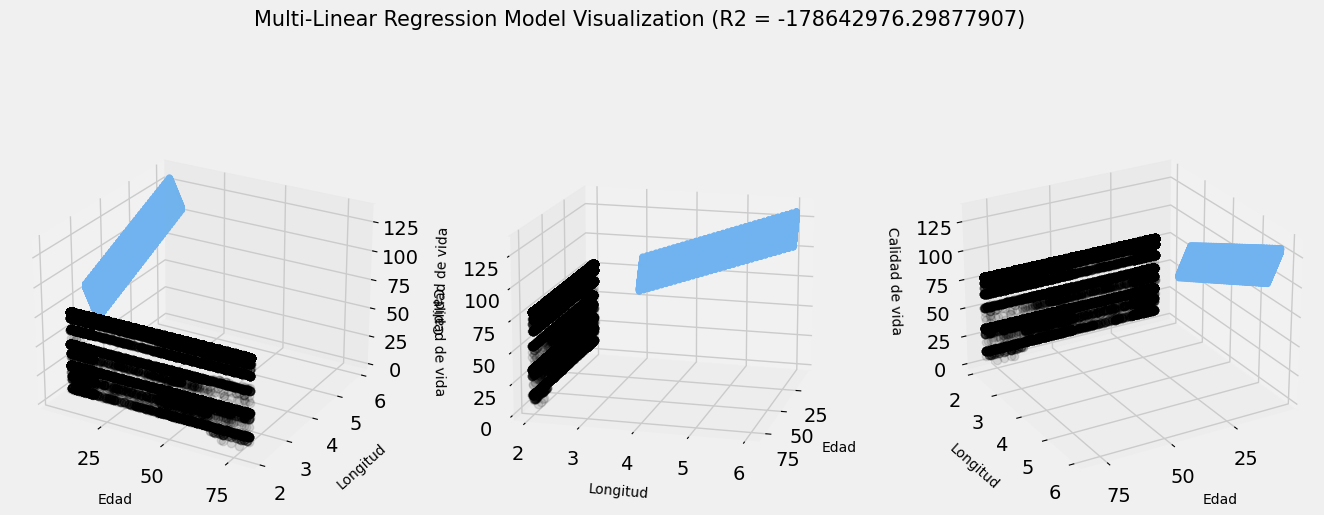

In [15]:
# Plotting a 3-D plot for visualizing the Multiple Linear Regression Model  
  
# Preparing the data  
independent = accesos[['edad', 'longitud']].values.reshape(-1,2)  
dependent = accesos['calidad_vida']  
  
# Creating a variable for each dimension  
x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
  
x_range = np.linspace(5, 10, 35)    
y_range = np.linspace(3, 6, 35)   
x1_range = np.linspace(3, 6, 35)  
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)  
viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T  
  
# Predicting price values using the linear regression model built above  
predictions = regressor.predict(viz)  
  
# Evaluating the model using the R2 square of the model  
r2 = regressor.score(X, y)  
  
# Ploting the model for visualization  
plt.style.use('fivethirtyeight')  
  
# Initializing a matplotlib figure  
fig = plt.figure(figsize = (15, 6))  
  
axis1 = fig.add_subplot(131, projection = '3d')  
axis2 = fig.add_subplot(132, projection = '3d')  
axis3 = fig.add_subplot(133, projection = '3d')  
  
axes = [axis1, axis2, axis3]  
  
for ax in axes:  
    ax.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
    ax.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')  
    ax.set_xlabel('Edad', fontsize = 10, labelpad = 10)  
    ax.set_ylabel('Longitud', fontsize = 10, labelpad = 10)  
    ax.set_zlabel('Calidad de vida', fontsize = 10, labelpad = 10)  
    ax.locator_params(nbins = 3, axis = 'x')  
    ax.locator_params(nbins = 3, axis = 'x')  
  
axis1.view_init(elev=25, azim=-60)  
axis2.view_init(elev=15, azim=15)  
axis3.view_init(elev=25, azim=60)  
  
fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k')  

### 11.3. Latitud y edad

Text(0.5, 0.98, 'Multi-Linear Regression Model Visualization (R2 = -68.15163175082121)')

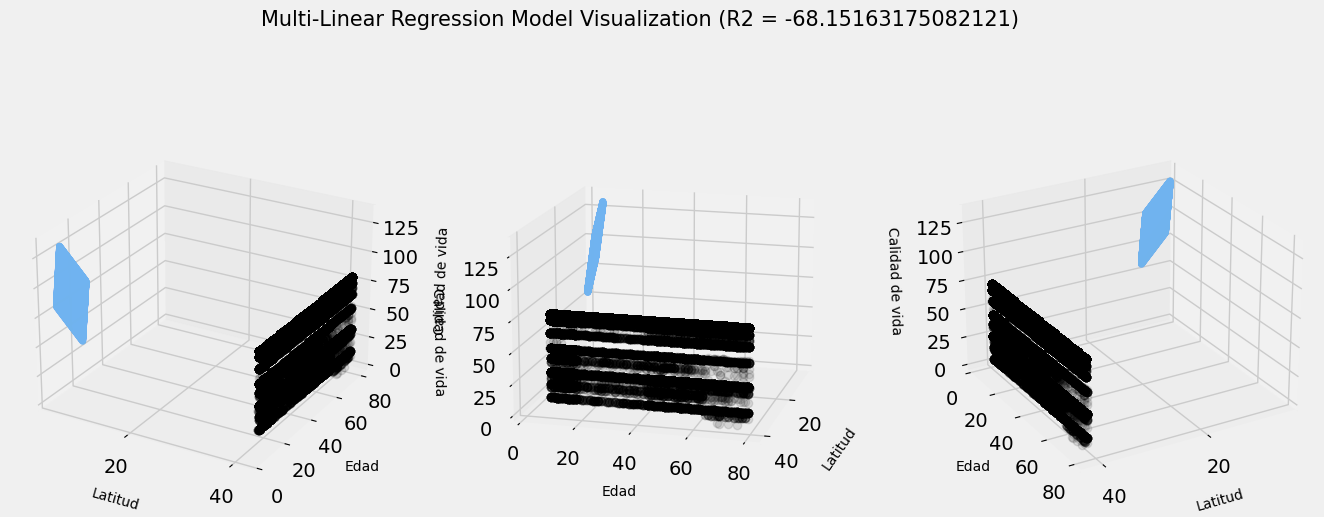

In [16]:
# Plotting a 3-D plot for visualizing the Multiple Linear Regression Model  
  
# Preparing the data  
independent = accesos[['latitud', 'edad']].values.reshape(-1,2)  
dependent = accesos['calidad_vida']  
  
# Creating a variable for each dimension  
x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
  
x_range = np.linspace(5, 10, 35)    
y_range = np.linspace(3, 6, 35)   
x1_range = np.linspace(3, 6, 35)  
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)  
viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T  
  
# Predicting price values using the linear regression model built above  
predictions = regressor.predict(viz)  
  
# Evaluating the model using the R2 square of the model  
r2 = regressor.score(X, y)  
  
# Ploting the model for visualization  
plt.style.use('fivethirtyeight')  
  
# Initializing a matplotlib figure  
fig = plt.figure(figsize = (15, 6))  
  
axis1 = fig.add_subplot(131, projection = '3d')  
axis2 = fig.add_subplot(132, projection = '3d')  
axis3 = fig.add_subplot(133, projection = '3d')  
  
axes = [axis1, axis2, axis3]  
  
for ax in axes:  
    ax.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
    ax.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')  
    ax.set_xlabel('Latitud', fontsize = 10, labelpad = 10)  
    ax.set_ylabel('Edad', fontsize = 10, labelpad = 10)  
    ax.set_zlabel('Calidad de vida', fontsize = 10, labelpad = 10)  
    ax.locator_params(nbins = 3, axis = 'x')  
    ax.locator_params(nbins = 3, axis = 'x')  
  
axis1.view_init(elev=25, azim=-60)  
axis2.view_init(elev=15, azim=15)  
axis3.view_init(elev=25, azim=60)  
  
fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k')  

### 11.4. Los tres en conjunto

Text(0.5, 0.98, 'Visualización del Modelo de Regresión Lineal Múltiple')

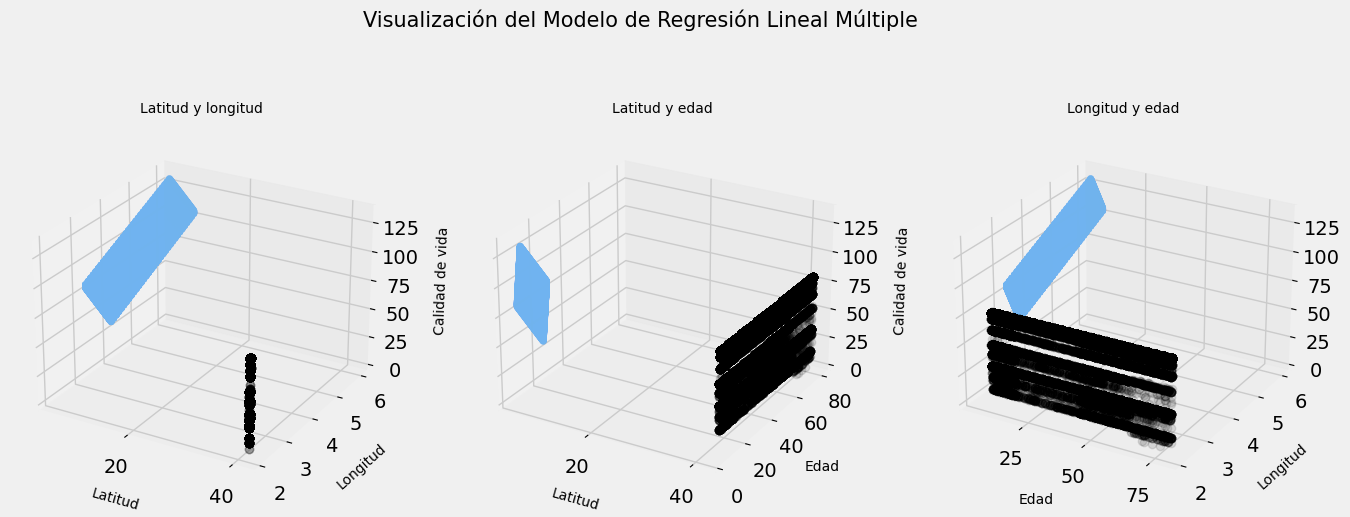

In [17]:
# Plotting a 3-D plot for visualizing the Multiple Linear Regression Model  
  
# Preparing the data  
independent = accesos[['latitud', 'longitud']].values.reshape(-1,2)  
dependent = accesos['calidad_vida']  
  
# Creating a variable for each dimension  
x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
  
x_range = np.linspace(5, 10, 35)    
y_range = np.linspace(3, 6, 35)   
x1_range = np.linspace(3, 6, 35)  
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)  
viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T  
  
# Predicting price values using the linear regression model built above  
predictions = regressor.predict(viz)  
  
# Evaluating the model using the R2 square of the model  
r2 = regressor.score(X, y)  
  
# Ploting the model for visualization  
plt.style.use('fivethirtyeight')  
  
# Initializing a matplotlib figure  
fig = plt.figure(figsize = (15, 6))  
  
axis1 = fig.add_subplot(131, projection = '3d')  
axis2 = fig.add_subplot(132, projection = '3d')  
axis3 = fig.add_subplot(133, projection = '3d')  
  
axes = [axis1, axis2, axis3]  
  
axis1.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
axis1.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')
axis1.set_title(f'Latitud y longitud', fontsize = 10)  
axis1.set_xlabel('Latitud', fontsize = 10, labelpad = 10)  
axis1.set_ylabel('Longitud', fontsize = 10, labelpad = 10)  
axis1.set_zlabel('Calidad de vida', fontsize = 10, labelpad = 10)  
axis1.locator_params(nbins = 3, axis = 'x')  
axis1.locator_params(nbins = 3, axis = 'x')    
axis1.view_init(elev=25, azim=-60)  

# Preparing the data  
independent = accesos[['latitud', 'edad']].values.reshape(-1,2)  
dependent = accesos['calidad_vida']   
  
# Creating a variable for each dimension  
x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
  
x_range = np.linspace(5, 10, 35)    
y_range = np.linspace(3, 6, 35)   
x1_range = np.linspace(3, 6, 35)  
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)  
viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T  
  
# Predicting price values using the linear regression model built above  
predictions = regressor.predict(viz)  
  
# Evaluating the model using the R2 square of the model  
r2 = regressor.score(X, y)  
  
# Ploting the model for visualization  
plt.style.use('fivethirtyeight')  

axis2.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
axis2.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')
axis2.set_title(f'Latitud y edad', fontsize = 10)  
axis2.set_xlabel('Latitud', fontsize = 10, labelpad = 10)  
axis2.set_ylabel('Edad', fontsize = 10, labelpad = 10)  
axis2.set_zlabel('Calidad de vida', fontsize = 10, labelpad = 10)  
axis2.locator_params(nbins = 3, axis = 'x')  
axis2.locator_params(nbins = 3, axis = 'x')    
axis2.view_init(elev=25, azim=-60)  

# Preparing the data  
independent = accesos[['edad', 'longitud']].values.reshape(-1,2)  
dependent = accesos['calidad_vida']  
  
# Creating a variable for each dimension  
x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
  
x_range = np.linspace(5, 10, 35)    
y_range = np.linspace(3, 6, 35)   
x1_range = np.linspace(3, 6, 35)  
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)  
viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T  
  
# Predicting price values using the linear regression model built above  
predictions = regressor.predict(viz)  
  
# Evaluating the model using the R2 square of the model  
r2 = regressor.score(X, y)  
  
# Ploting the model for visualization  
plt.style.use('fivethirtyeight')  

axis3.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
axis3.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')
axis3.set_title(f'Longitud y edad', fontsize = 10)  
axis3.set_xlabel('Edad', fontsize = 10, labelpad = 10)  
axis3.set_ylabel('Longitud', fontsize = 10, labelpad = 10)  
axis3.set_zlabel('Calidad de vida', fontsize = 10, labelpad = 10)  
axis3.locator_params(nbins = 3, axis = 'x')  
axis3.locator_params(nbins = 3, axis = 'x')    
axis3.view_init(elev=25, azim=-60)  
  
fig.suptitle(f'Visualización del Modelo de Regresión Lineal Múltiple', fontsize = 15, color = 'k')  

## 12. Guardar el mejor modelo

In [18]:
# save
with open('Modelos/Regresion_Lineal.pkl','wb') as f:
    pickle.dump(regressor,f)

## 13. Ejemplo de predicción

In [19]:
print(regressor.predict(sc.transform([['425060.955125', '4.606138e+06', '22']]))) 

[6.29e+09]
